In [1]:
#IMPORT MODULES

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

/Users/shruthisivasubramanian/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# READ PROCESSED DATA
df = pd.read_csv('Final Data');

In [3]:
#PICK THE REQUIRED FEATURES FROM THE DATASET
X = np.array(df[['2 min wind speed squared','Avg Wind Speed Squared','5 second wind speed squared','Fog/Ice','Heavy/Freezing Fog','Thunder']]);
y = np.array(df['Power Outage']);

#Split the data into X and Y, and then into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 20);

In [4]:
# FUNCTIONS RESPONSIBLE FOR GENERATING HASH VALUE AND CHECK HASH SIMILARITY 

def hashValue(data, planes):

    signature = 0
    for plane in planes:
        signature = signature << 1
        val = np.dot(plane,data)
        if val >=0:
            signature = signature | 1

    return signature

def onesCount(n):
    count = 0
    if n == 0:
        return 0
    else:
        while n:
            count += 1
            n = n & (n-1)
    return count

In [5]:
#DECLARE NUMBER OF RUNS, NUMBER OF PLANES AND DATA DIMENSIONALITY

dim = 6
bits = 28
run = 25

In [6]:
points_train = X_train;
points_test = np.array(X_test)

In [7]:
#CODE THAT ALLOCATES TESTING DATA TO THE CLOSEST SUBSPACE

sig = np.zeros(len(points_train))
max_prob = 0
pred = np.zeros(len(points_test) * run).reshape(len(points_test), run)
predict = np.zeros(len(points_test))
actualPoint = np.zeros(len(points_test))
#y_test = final_y;
#y_test = np.ones(91)

for i in range(0, run):
    planes = np.random.randn(bits, dim)
    
    for k in range(0, len(points_train)):
        sig[k] = hashValue(points_train[k], planes)
        
    
    for p in range(0, len(points_test)):
        point_test = points_test[p]
       
        sig_test = hashValue(point_test, planes)
        
        
        for j in range(0, len(points_train)):
            probSameHash = 1 - (onesCount(sig_test^int(sig[j]))/bits)


            if probSameHash>=max_prob:
                max_prob = probSameHash
                index = j
          
        actualPoint[p] = index
        pred[p][i] = y_train[index]

for pr in range (0, len(pred)):
    if sum(pred[pr]) >= (run/2):
        predict[pr] = 1.0
    else:
        predict[pr] = 0.0

In [8]:
#ACCURACY CALCULATION

accuracy = accuracy_score(predict, y_test);
print(accuracy)

0.847619047619


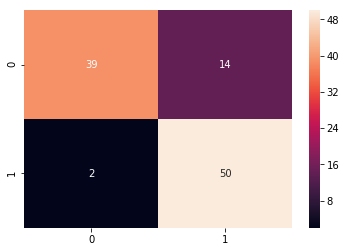

In [9]:
#HEATMAP GENERATION

cm = pd.DataFrame(confusion_matrix(y_test, predict));
sns.heatmap(cm, annot=True);
plt.show();